The Guardian Balance: {'Male Mentions': 1266, 'Female Mentions': 720}
Runners World Balance: {'Male Mentions': 622, 'Female Mentions': 1171}
I Run Far Balance: {'Male Mentions': 4366, 'Female Mentions': 4398}


<Figure size 1000x600 with 0 Axes>

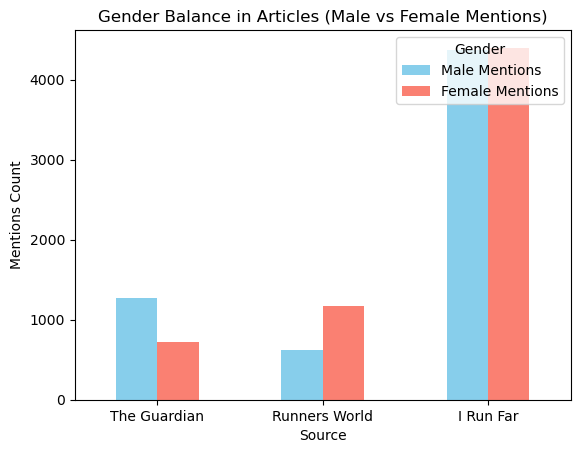

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import re 

# Load the datasets
guardian_df = pd.read_csv('thegaurdian.csv')
runnersworld_df = pd.read_csv('runnersworld.csv')
irunfar_df = pd.read_csv('irunfar.csv')

# Define gender-specific keywords for analysis
male_keywords = ["he", "him", "his", "man", "male", "men", "boy", "guy", "father", "brother", "son", "gentleman"]
female_keywords = ["she", "her", "hers", "woman", "female", "women", "girl", "lady", "mother", "sister", "daughter", "gentlewoman"]

# Function to check gender balance by counting occurrences of gender keywords
def gender_balance_check(df):
    # Standardize column names to lowercase
    df.columns = [col.lower() for col in df.columns]
    
    # Initialize counts
    male_count = 0
    female_count = 0
    
    # Count gender keywords in the "header" and "body" columns
    for _, row in df.iterrows():
        text = f"{row['header']} {row['body']}".lower()  # Combine Header and Body
        
        # Use regex to match whole words only
        for word in male_keywords:
            male_count += len(re.findall(r'\b' + re.escape(word) + r'\b', text))
        
        for word in female_keywords:
            female_count += len(re.findall(r'\b' + re.escape(word) + r'\b', text))
    
    return {'Male Mentions': male_count, 'Female Mentions': female_count}

# Check gender balance in each file
guardian_balance = gender_balance_check(guardian_df)
runnersworld_balance = gender_balance_check(runnersworld_df)
irunfar_balance = gender_balance_check(irunfar_df)

# Combine results into a single dictionary for plotting
balance_data = {
    'The Guardian': guardian_balance,
    'Runners World': runnersworld_balance,
    'I Run Far': irunfar_balance
}

# Convert the results into a DataFrame for easier plotting
balance_df = pd.DataFrame(balance_data).T

# Display results
print("The Guardian Balance:", guardian_balance)
print("Runners World Balance:", runnersworld_balance)
print("I Run Far Balance:", irunfar_balance)

# Plot the results
plt.figure(figsize=(10, 6))
balance_df.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Gender Balance in Articles (Male vs Female Mentions)')
plt.xlabel('Source')
plt.ylabel('Mentions Count')
plt.xticks(rotation=0)
plt.legend(title="Gender", loc='upper right')
plt.show()


The Guardian Gender Labels:
 Gender Label
Male      51
Female    19
None       9
Both       5
Name: count, dtype: int64

Runners World Gender Labels:
 Gender Label
Female    42
Male      32
Both       6
None       3
Name: count, dtype: int64

I Run Far Gender Labels:
 Gender Label
Both      70
Female    67
Male      59
Name: count, dtype: int64


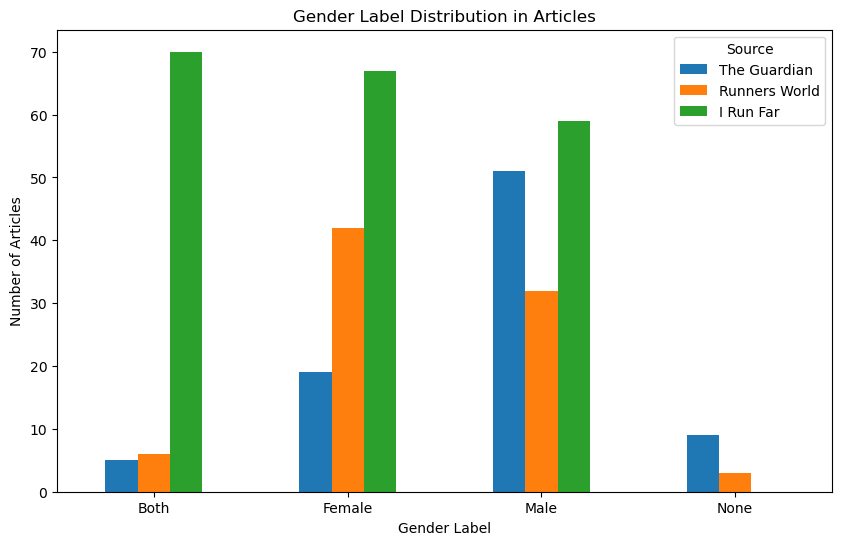

In [37]:
# Define the threshold for balanced mentions (within 20%)
BALANCE_THRESHOLD = 0.2

# Function to categorize each article as Male, Female, or Both based on keywords
def gender_article_label(df):
    # Standardize column names to lowercase for consistent access
    df.columns = [col.lower() for col in df.columns]
    
    # Initialize labels
    labels = []
    
    # Label each article based only on the body of the article
    for _, row in df.iterrows():
        text = row['body'].lower()
        
        # Use regex to count occurrences of male and female keywords
        male_count = sum(len(re.findall(r'\b' + re.escape(word) + r'\b', text)) for word in male_keywords)
        female_count = sum(len(re.findall(r'\b' + re.escape(word) + r'\b', text)) for word in female_keywords)
        
        # Determine label based on relative counts
        if male_count > 0 and female_count > 0:
            # Check if the counts are relatively balanced
            if abs(male_count - female_count) / max(male_count, female_count) <= BALANCE_THRESHOLD:
                labels.append("Both")
            elif male_count > female_count:
                labels.append("Male")
            else:
                labels.append("Female")
        elif male_count > 0 and female_count == 0:
            labels.append("Male")
        elif female_count > 0 and male_count == 0:
            labels.append("Female")
        else:
            labels.append("None")  # No clear gender indication
            
    # Add the labels as a new column in the DataFrame
    df['Gender Label'] = labels
    return df

# Apply the function to each DataFrame and count the labels
guardian_df = gender_article_label(guardian_df)
runnersworld_df = gender_article_label(runnersworld_df)
irunfar_df = gender_article_label(irunfar_df)

# Count the number of articles in each category for each dataset
guardian_counts = guardian_df['Gender Label'].value_counts()
runnersworld_counts = runnersworld_df['Gender Label'].value_counts()
irunfar_counts = irunfar_df['Gender Label'].value_counts()

# Combine counts into a single DataFrame for visualization
gender_counts = pd.DataFrame({
    'The Guardian': guardian_counts,
    'Runners World': runnersworld_counts,
    'I Run Far': irunfar_counts
}).fillna(0)  # Fill missing values with 0

# Display counts
print("The Guardian Gender Labels:\n", guardian_counts)
print("\nRunners World Gender Labels:\n", runnersworld_counts)
print("\nI Run Far Gender Labels:\n", irunfar_counts)

# Plot the results as a bar chart
gender_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Gender Label Distribution in Articles')
plt.xlabel('Gender Label')
plt.ylabel('Number of Articles')
plt.legend(title="Source", loc='upper right')
plt.xticks(rotation=0)
plt.show()
